# Lab 3: Breast Cancer Coimbra Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
)

# ===== Optional : import other libraries here ===== #

# ===== End of Optional : import other libraries here ===== #

## Problem 1 (a): Download dataset
Create a new folder named `data` under this repo directory. Download Breast Cancer Coimbra Data Set from homework Lab3 Dropbox and extract file `dataR2.csv` to directory `./data` you just created.

In [9]:
# Visualization: Load dataset

df = pd.read_csv('/content/dataR2.csv')
features_pd = df.copy()
classification = features_pd.pop('Classification').to_numpy().astype(int)
print(">>> example features:\n", features_pd.head(5))
print(">>> example classification:", classification[:5])
print(">>> classification has unique (labels, counts):", np.unique(classification, return_counts=True))
features = features_pd.to_numpy().astype(np.float32)
print(">>> features has shape:", features.shape)

>>> example features:
    Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  
0  417.114  
1  468.786  
2  554.697  
3  928.220  
4  773.920  
>>> example classification: [0 0 0 0 0]
>>> classification has unique (labels, counts): (array([0, 1]), array([52, 64]))
>>> features has shape: (116, 9)


## Problem 1 (b): Exploratory data analysis
- Convert `classification` from [1, 2] to [0, 1] and save in new numpy array `classification_converted`.
- Plot scatter matrix with class=0 being red and class=1 being green.
- Select the first 40 rows of Class 0 and the first 48 rows of Class 1 as the training set (`training_data`, `training_class`) and the rest of the data as the test set (`test_data`, `test_class`).

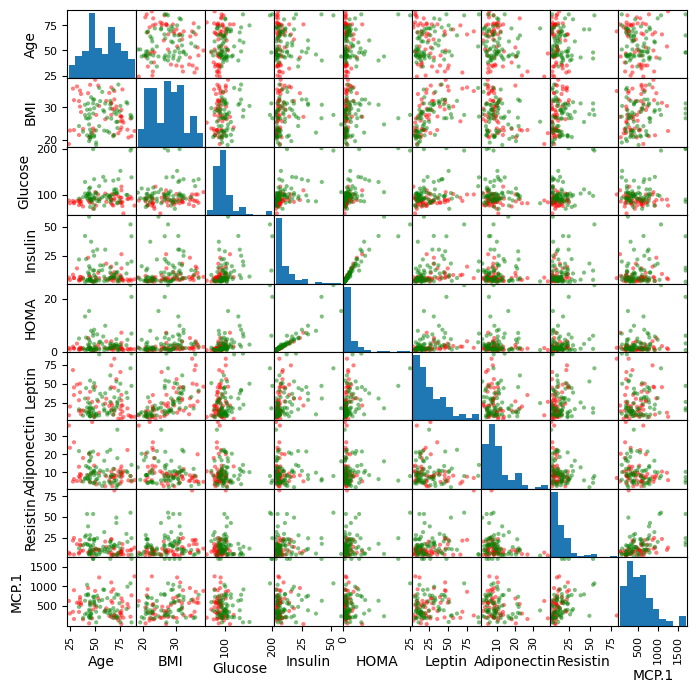

In [114]:
classification_converted = classification.copy()
training_data, training_class = None, None
test_data, test_class = None, None

# ===== Convert classification to 0 or 1 ===== #
classification_converted = classification.copy()
# ===== End of Convert classification to 0 or 1 ===== #

# ===== Make a colored scatter matrix ===== #
# Hint: use variable features_pd and pd.plotting.scatter_matrix()

pd.plotting.scatter_matrix(features_pd,c = df['Classification'].map({1: 'green', 0: 'red'}), figsize = (8,8))
# ===== End of Make a colored scatter matrix ===== #

# ===== Divide into training and test set ===== #
training_data = pd.concat([df[df['Classification'] == 0].iloc[0:40],df[df['Classification'] == 1].iloc[0:48]],ignore_index=True)

training_class = training_data.pop("Classification")
test_data = pd.concat([df[df['Classification'] == 0].iloc[40:],df[df['Classification'] == 1].iloc[48:]],ignore_index=True)

test_class = test_data.pop('Classification')

# ===== End of Divide into training and test set ===== #

In [85]:
# TEST: 1(b)
assert(len(np.where(classification_converted == 0)[0]) == 52)
assert(len(np.where(classification_converted == 1)[0]) == 64)
assert(len(np.unique(classification_converted)) == 2)

assert(training_data.shape[0] == 88 and training_data.shape[1] == 9)
assert(test_data.shape[0] == 28 and test_data.shape[1] == 9)
assert(training_class.shape[0] == 88)
assert(test_class.shape[0] == 28)

print(f">>> Passed P1(b) Tests.")

>>> Passed P1(b) Tests.


## Problem 1 (c): Classification using KNN on Breast Cancer Coimbra Data Set
- Train kNN module with training data. Set `weights` to `uniform`, `metric` to `euclidean`.
- Compute misclassification rates on both training and test dataset.
- Find and report the best k.

[0.5357142857142857, 0.5, 0.5, 0.42857142857142855, 0.4642857142857143, 0.42857142857142855, 0.5, 0.42857142857142855, 0.4642857142857143, 0.5, 0.5357142857142857, 0.5357142857142857, 0.5357142857142857, 0.42857142857142855, 0.42857142857142855, 0.4642857142857143, 0.5357142857142857, 0.4642857142857143, 0.42857142857142855, 0.5, 0.4642857142857143, 0.4642857142857143, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


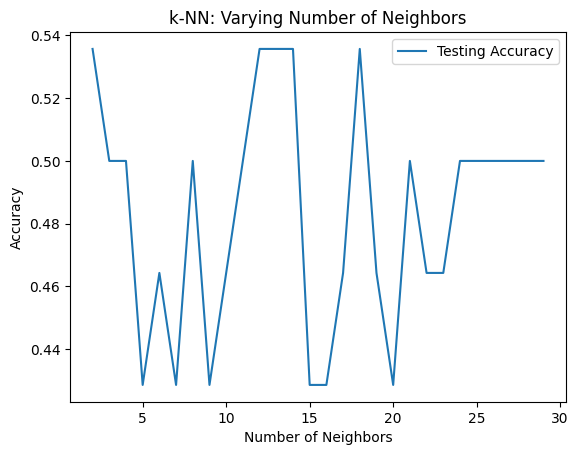

In [127]:
# ===== Classify training/test data ===== #


\


# ===== End of Classify training/test data ===== #

# ===== Plot misclassification rate ===== #

z = []
for i in range(2,30):
  knn = KNeighborsClassifier(weights = "uniform",metric="euclidean", n_neighbors=i)
  knn.fit(training_data,training_class)
  class_predict = knn.predict(test_data)
  z += [accuracy_score(test_class,class_predict)]

no_neighbors = np.arange(2,30)
print(z)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, z, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
# ===== End of Plot misclassification rate ===== #

In [ ]:
# ===== Which k^* is the most suitable k ===== #

# ANSWER: K^* is {15}.

# REASON:
#because it is the biggest value for a number in the middle, if it is too low it is not accurate and to high still not good
# ===== End of Which k^* is the most suitable k ===== #

## Problem 1 (d): Replace the Euclidean metric with the Minkowski distance
- Train kNN module with training data. Set `weights` to `uniform`, `metric` to `minkowski`.
- Compute misclassification rates on both training and test dataset.
- Find and report the best k and p.

In [94]:
# ===== Classify training/test data ===== #
knn = KNeighborsClassifier(weights = "uniform",metric="minkowski", n_neighbors=11, p = 1)
knn.fit(training_data,training_class)
class_predict = knn.predict(test_data)

# ===== End of Classify training/test data ===== #
print(accuracy_score(test_class,class_predict))

# ===== Find the optimal (k^*, p^*) ===== #
#
# ANSWER: k^* is {11}, p^* is {1}.
# ===== End of Find the optimal (k, p) ===== #

0.6785714285714286


# Extra Credit
- Train kNN module with training data. Set `weights` to `distance`, `metric` to `minkowski`.
- Compute misclassification rates on both training and test dataset.
- Find and report the best k and p.

In [83]:
# ===== Classify training/test data ===== #
temp  = 0
for i in range(3,30):
  for j in range(100,201):
    knn = KNeighborsClassifier(weights = "distance",metric="minkowski", n_neighbors = i, p = j/100)
    knn.fit(training_data,training_class)
    class_predict = knn.predict(test_data)
    if accuracy_score(test_class,class_predict) > temp:
      print(i,j)
      temp = accuracy_score(test_class,class_predict)
      print(temp)
# ===== End of Classify training/test data ===== #

# ===== Find the optimal (k^*, p^*) ===== #

# ANSWER: k^* is {12}, p^* is {1}.
# ===== End of Find the optimal (k, p) ===== #

3 100
0.4642857142857143
3 121
0.5
3 140
0.5357142857142857
9 118
0.5714285714285714
9 125
0.6071428571428571
11 100
0.6428571428571429
12 100
0.6785714285714286
